# Covid 19 - Johns Hopkins University

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
covid19 = pd.read_csv('countries-aggregated_csv.csv',sep=",")

In [10]:
covid19.head()

Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-22      Albania          0          0       0
2  2020-01-22      Algeria          0          0       0
3  2020-01-22      Andorra          0          0       0
4  2020-01-22       Angola          0          0       0

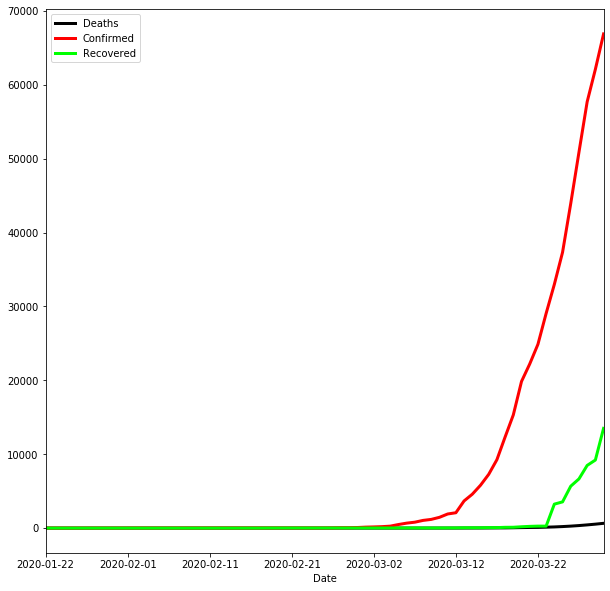

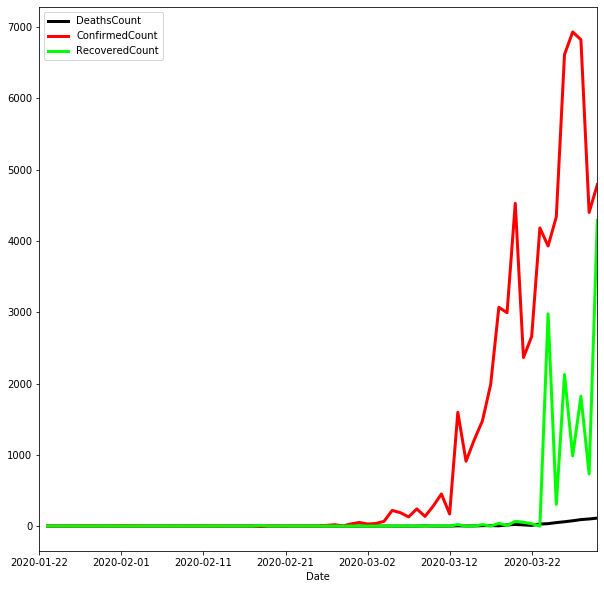

In [11]:
countryData = covid19[covid19["Country"] == "Germany"].copy(deep=True)

for key in ["Deaths","Confirmed","Recovered"]:
    countryData.loc[:,(key + "Count")] = countryData[key] - countryData[key].shift(1)

plotData = [['Deaths','Confirmed','Recovered'],['DeathsCount','ConfirmedCount','RecoveredCount']]

for key,data in enumerate(plotData):
    countryData.reset_index().plot(x ='Date', y=data,color=['black','red','lime'], kind = 'line', stacked=False, figsize=(10,10), linewidth=3)
    
    plt.legend(frameon=True, loc='upper left')
    
    plt.savefig(str(key) + '-data.png',dpi=200,pad_inches=5)

In [6]:
countryData.Country.unique()

array(['Germany'], dtype=object)

In [29]:
covid19.loc[covid19["Date"] == "2020-03-30"].groupby(['Country']).sum().sort_values("Deaths")[-10:]

Confirmed  Recovered  Deaths
Country                                     
Belgium             11899       1527     513
Germany             66885      13500     645
Netherlands         11817        253     865
United Kingdom      22453        171    1411
Iran                41495      13911    2757
US                 161807       5644    2978
France              45170       7964    3030
China               82198      75923    3308
Spain               87956      16780    7716
Italy              101739      14620   11591

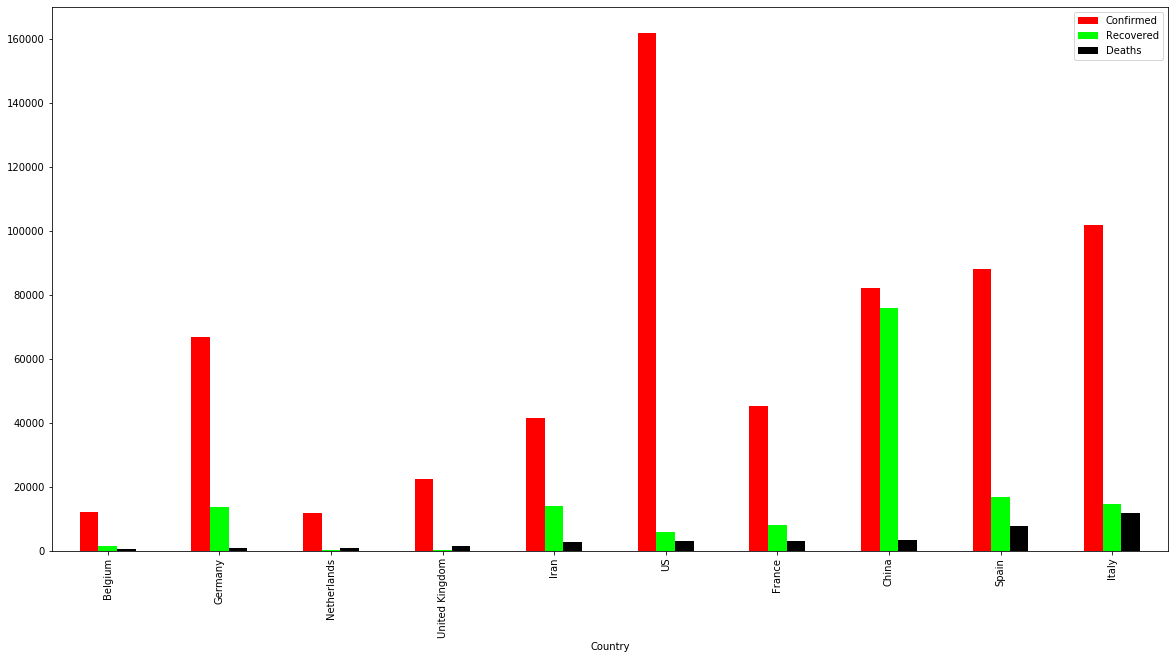

In [34]:
plotCountrys = covid19.loc[covid19["Date"] == "2020-03-30"].groupby(['Country']).sum().sort_values("Deaths")[-10:].plot(kind="bar",figsize=(20,10),color=['red','lime','black'])

plotCountrys.get_figure().savefig('countrys.png',dpi=200,pad_inches=5)

Vielen Dank fürs Lesen

https://hellocoding.de/impressum

https://hellocoding.de/datenschutz

https://hellocoding.de/blog/coding-language/python/covid-19-data-science